<a href="https://colab.research.google.com/github/LoveMeWithoutAll/keraspp/blob/feature%2Fch03/DNN_classification_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
  
  Y_train = np_utils.to_categorical(y_train)
  Y_test = np_utils.to_categorical(y_test)

  L, W, H, C = X_train.shape
  X_train = X_train.reshape(-1, W * H * C)
  X_test = X_test.reshape(-1, W * H * C)

  X_train = X_train / 255.0
  X_test = X_test / 255.0

  return (X_train, Y_train), (X_test, Y_test)

In [0]:
from keras import layers, models

class DNN(models.Sequential):
  def __init__(self, Nin, Nh_l, Pd_l, Nout):
    super().__init__()

    self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
    self.add(layers.Dropout(Pd_l[0]))
    self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
    self.add(layers.Dropout(Pd_l[1]))
    self.add(layers.Dense(Nout, activation='softmax'))
    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

In [0]:
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()

In [0]:
def main(Pd_l=[0.0, 0.0]):
  Nh_l = [100, 50]
  number_of_class = 10
  Nout = number_of_class

  (X_train, Y_train), (X_test, Y_test) = Data_func()
  model = DNN(X_train.shape[1], Nh_l, Pd_l=Pd_l, Nout=Nout)

  history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

  performance_test = model.evaluate(X_test, Y_test, batch_size=100)
  print('Test Loss and Accuracy ->', performance_test)

  plot_acc(history)
  plt.show()

  plot_loss(history=history)
  plt.show()

170500096/170498071 [==============================] - 2s 0us/step





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/100





40000/40000 [==============================] - 12s 302us/step - loss: 1.9253 - acc: 0.3055 - val_loss: 1.8173 - val_acc: 0.3557
Epoch 2/100
40000/40000 [==============================] - 2s 56us/step - loss: 1.7569 - acc: 0.3741 - val_loss: 1.8451 - val_acc: 0.3481
Epoch 3/100
40000/40000 [==============================] - 2s 56us/step - loss: 1.6729 - acc: 0.4054 - val_loss: 1.6822 - val_acc: 0.4006
Epoch 4/100
40000/40000 [==============================] - 2s 54us/step - loss: 1.6342 - acc: 0.4192 - val_loss: 1.6811 - val_acc: 0.4022
Epoch 5/100
40000/40000 [==============================] - 2s 56us/step - loss: 1.5977 - acc: 0.4309 - val_loss: 1.6258 - val_acc: 0.4205
Epoch 6/100
40000/40000 [==============================] - 2s 56us/step - loss: 1.56

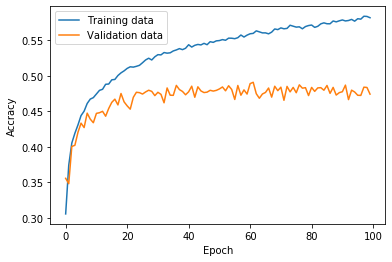

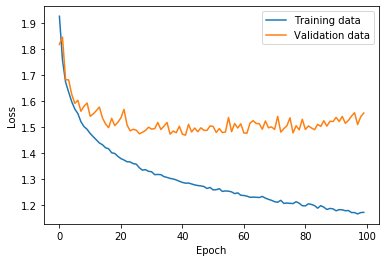

In [0]:
if __name__ == '__main__':
  main(Pd_l=[0.0, 0.0])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 65us/step - loss: 2.1053 - acc: 0.2228 - val_loss: 1.9382 - val_acc: 0.2922
Epoch 2/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.9600 - acc: 0.2812 - val_loss: 1.8630 - val_acc: 0.3226
Epoch 3/100
40000/40000 [==============================] - 2s 61us/step - loss: 1.8984 - acc: 0.3041 - val_loss: 1.8032 - val_acc: 0.3449
Epoch 4/100
40000/40000 [==============================] - 2s 61us/step - loss: 1.8704 - acc: 0.3186 - val_loss: 1.7938 - val_acc: 0.3456
Epoch 5/100
40000/40000 [==============================] - 2s 62us/step - loss: 1.8471 - acc: 0.3296 - val_loss: 1.7662 - val_acc: 0.3627
Epoch 6/100
40000/40000 [==============================] - 2s 59us/step - loss: 1.8326 - acc: 0.3317 - val_loss: 1.7521 - val_acc: 0.3685
Epoch 

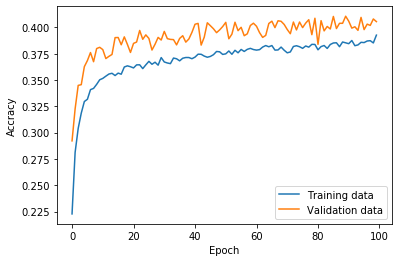

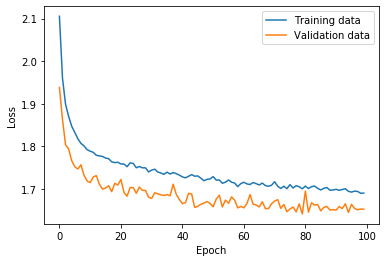

In [0]:
if __name__ == '__main__':
  main(Pd_l=[0.05, 0.5])